# **PIA: Entrenamiento de una red neuronal convolucional**

Equipo:

Rafael Medellín García 2021626

Patricio Leija Treviño 1996641

Juan Carlos Garcia Reyes 2000889

Carlos Andrés Chávez Rivera 2109415

Carlos Eduardo Estrada Hernández 2109339

Hora: Martes N4-N6


# **Importar Librerias**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import glob

# **Importar Dataset desde Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Ruta al archivo ZIP en Google Drive
ruta_zip = '/content/drive/My Drive/Car Brands Ajustado V2.zip'

# Directorio de extracción
directorio_extraccion = '/content/Car_Brands_Ajustado_V2'

# Descomprimir el archivo ZIP
with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_extraccion)

# **Preprocesamiento aplicado a las imágenes**

In [ ]:
imagenes = []
etiquetas = []

In [ ]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Car_Brands_Ajustado_V2'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:
    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        # Modifica el patrón para que coincida con .jpg, .jpeg y .png
        for extension in ['*.jpg', '*.jpeg', '*.png']:
            for x in glob.iglob(os.path.join(subcarpeta, extension)):
                print(x)
                # Lee la imagen
                test_image = cv2.imread(x)

                if test_image is not None:  # Verifica si la imagen se leyó correctamente
                    # Redimensiona la imagen
                    img_resized = cv2.resize(test_image, (30, 30))

                    # Guarda la imagen y su etiqueta
                    arreglo_imagen = np.array(img_resized)
                    imagenes.append(arreglo_imagen)
                    etiquetas.append(z)
    z += 1

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/Car_Brands_Ajustado_V2/Renault/17_314_644a54d2-ffff-4d35-b888-412dfbdf911e (2).jpeg
/content/Car_Brands_Ajustado_V2/Renault/9e094825-ad8b-4d2a-a2ce-8a86e27c1f39.jpeg
/content/Car_Brands_Ajustado_V2/Renault/org_84c45002-1378-42b7-b727-8b2763f00f02.jpeg
/content/Car_Brands_Ajustado_V2/Renault/org_778b9779-b55b-40b8-a135-ab272ec4b2f5.jpeg
/content/Car_Brands_Ajustado_V2/Renault/IMG_0502-768x1024.jpeg
/content/Car_Brands_Ajustado_V2/Renault/org_3e7946bf-13dc-4dde-bdfb-5d96616be3df.jpeg
/content/Car_Brands_Ajustado_V2/Renault/985D8B3D8AAD8B9D985D984D8A9-D984D984D8A8D98AD8B9-D981D989-D985D8B5D8B1-20182.jpeg
/content/Car_Brands_Ajustado_V2/Renault/org_adbc9206-766b-45ae-a426-e168faca1114.jpeg
/content/Car_Brands_Ajustado_V2/Renault/org_21f73c85-b66c-442c-ad75-93d1e60f3f87.jpeg
/content/Car_Brands_Ajustado_V2/Renault/org_762153c8-7cf8-4a12-90af-83ce6fdabdee.jpeg
/content/Car_Brands_Ajustado_V2/Renault/985D8B3D8AAD8B9D9

In [ ]:
etiquetas = np.array(etiquetas)

In [ ]:
images = np.array(imagenes)

In [ ]:
np.shape(images)

(6912, 30, 30, 3)

In [ ]:
len(etiquetas)

6912

In [ ]:
etiquetas[20]

0

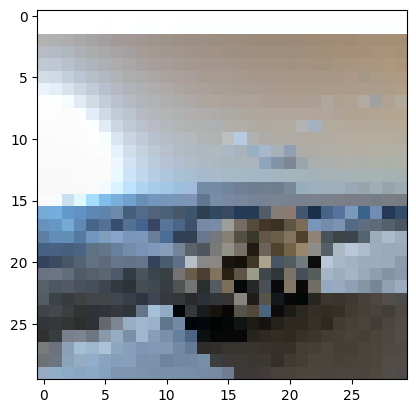

In [ ]:
plt.imshow(imagenes[20])

In [ ]:
arreglo_imagen = np.array(img_resized)
imagenes.append(arreglo_imagen)

In [ ]:
if len(imagenes) > len(etiquetas):
    imagenes = imagenes[:len(etiquetas)]
elif len(etiquetas) > len(imagenes):
    etiquetas = etiquetas[:len(imagenes)]

print(f"Longitud sincronizada de imagenes: {len(imagenes)}")
print(f"Longitud sincronizada de etiquetas: {len(etiquetas)}")

from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42
)

Longitud sincronizada de imagenes: 6912
Longitud sincronizada de etiquetas: 6912


# **Asignación de Clases y Verificación de Datos**

In [ ]:
class_names = ['Hyundai', 'Ford', 'Mitsubishi', 'Renault', 'Suzuki',
                'KIA', 'Chevrolet', 'Skoda', 'Honda',
               'BMW', 'Volkswagen', 'Mercedes-Benz', 'Toyota', 'Nissan']
print(class_names)

['Hyundai', 'Ford', 'Mitsubishi', 'Renault', 'Suzuki', 'KIA', 'Chevrolet', 'Skoda', 'Honda', 'BMW', 'Volkswagen', 'Mercedes-Benz', 'Toyota', 'Nissan']


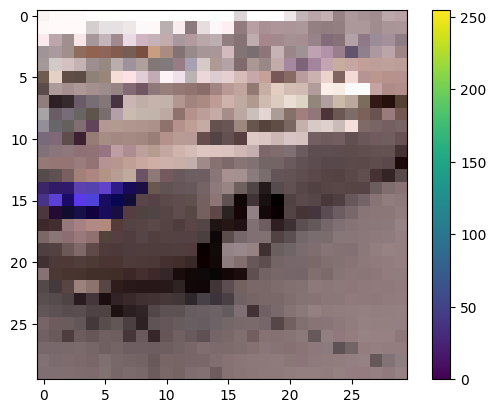

In [ ]:
plt.figure()
plt.imshow(train_images[30])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[30]

6

In [ ]:
# Convertir las listas a arrays de NumPy
train_images = np.array(train_images)
test_images = np.array(test_images)

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0


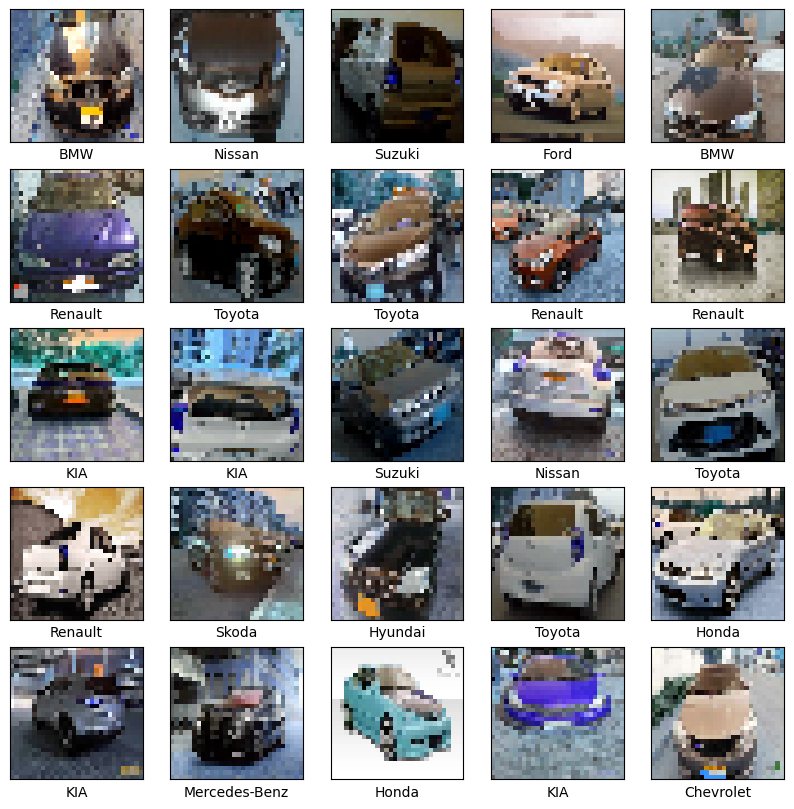

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Selección de Modelo y Entrenamiento**

In [ ]:
model = models.Sequential()

# Capas Convolucionales y de Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Aplanar y Capas Densas
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(14))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 12, 12, 64)        2

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
173/173 [==============================] - 10s 48ms/step - loss: 1.3101 - accuracy: 0.6710 - val_loss: 2.9268 - val_accuracy: 0.3283
Epoch 2/20
173/173 [==============================] - 10s 59ms/step - loss: 1.2756 - accuracy: 0.6849 - val_loss: 2.6751 - val_accuracy: 0.3514
Epoch 3/20
173/173 [==============================] - 9s 52ms/step - loss: 1.2626 - accuracy: 0.6851 - val_loss: 2.6551 - val_accuracy: 0.3572
Epoch 4/20
173/173 [==============================] - 9s 52ms/step - loss: 1.2837 - accuracy: 0.6781 - val_loss: 2.6614 - val_accuracy: 0.3485
Epoch 5/20
173/173 [==============================] - 10s 59ms/step - loss: 1.2501 - accuracy: 0.6927 - val_loss: 2.6267 - val_accuracy: 0.3514
Epoch 6/20
173/173 [==============================] - 8s 46ms/step - loss: 1.2705 - accuracy: 0.6799 - val_loss: 2.6756 - val_accuracy: 0.3492
Epoch 7/20
173/173 [==============================] - 10s 59ms/step - loss: 1.2450 - accuracy: 0.6940 - val_loss: 2.6849 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

44/44 - 0s - loss: 2.6217 - accuracy: 0.3666 - 451ms/epoch - 10ms/step

Test accuracy: 0.3665943741798401


# **Predicciones y Resultados**

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

44/44 [==============================] - 1s 11ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(14))
  plt.yticks([])
  thisplot = plt.bar(range(14), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

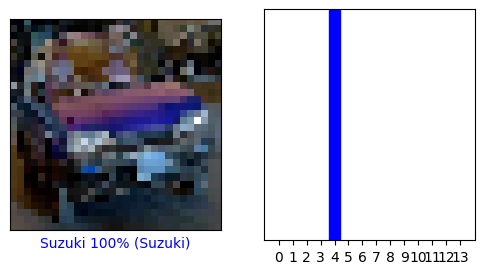

In [ ]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

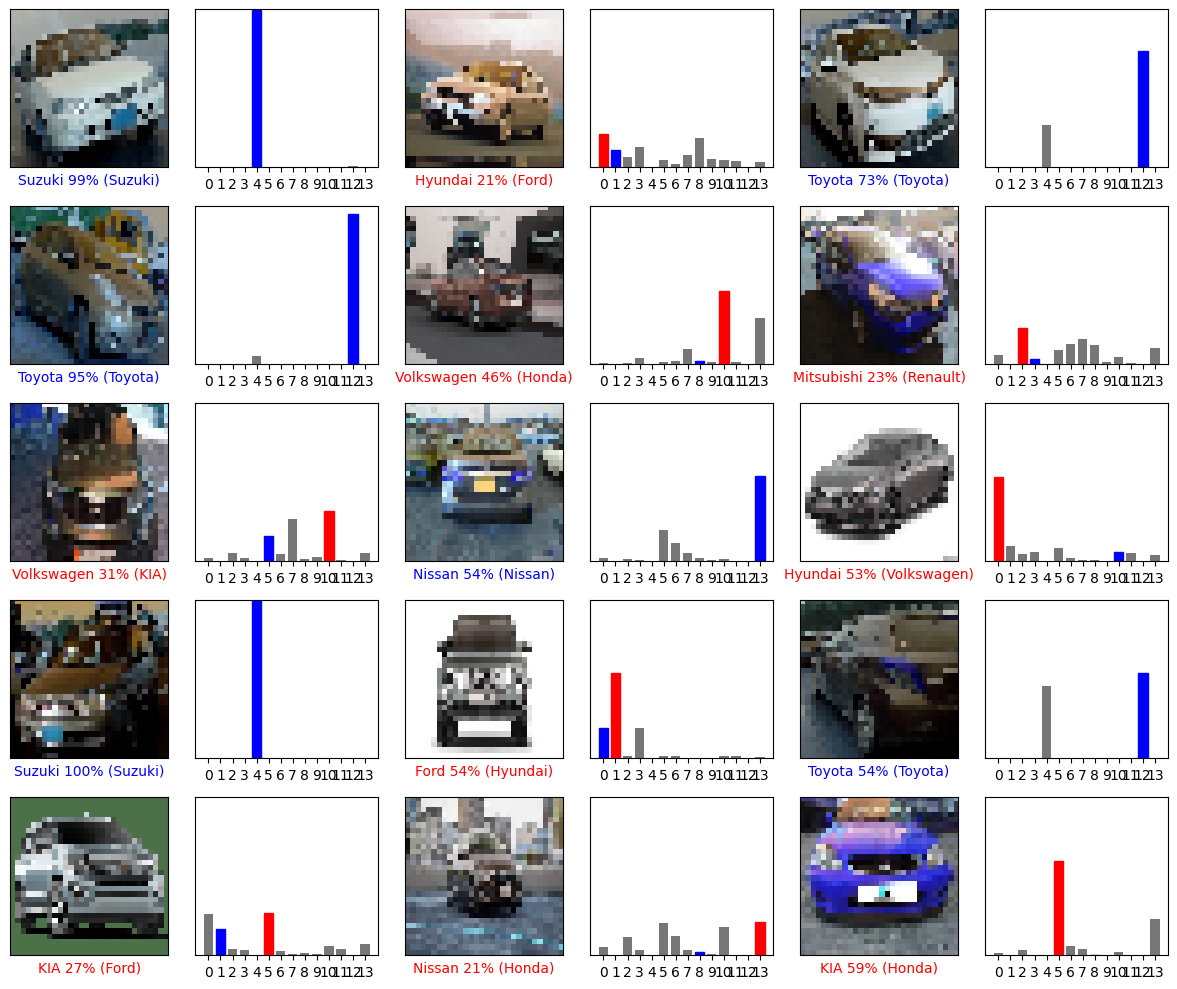

In [ ]:
# El color azul indica una predicción correcta y el color rojo indica una predicción incorrecta.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

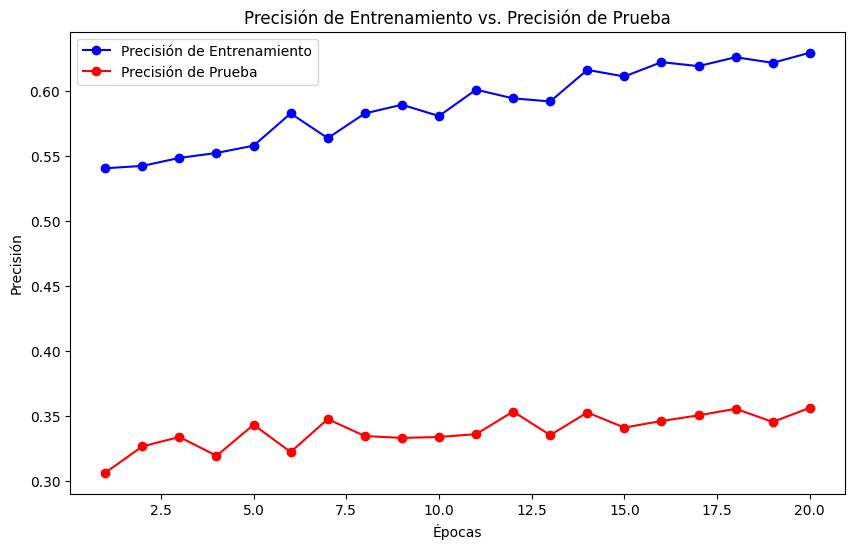

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'ro-', label='Precisión de Prueba')
plt.title('Precisión de Entrenamiento vs. Precisión de Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()